<a href="https://colab.research.google.com/github/rafaelarruda/DatasetCarros/blob/main/DataSet_Carros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font size= 8 color = green> Análise Exploratória

<font size=5>**Fazendo o import direto do Driver do Google**

In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/DataScience/Dados/Carros.csv', sep=';')
df.head()

,Consumo,Cilindros,Cilindradas,RelEixoTraseiro,Peso,Tempo,TipoMotor,Transmissao,Marchas,Carburadors,HP
0,21,6,160,39,262,1646,0,1,4,4,110
1,21,6,160,39,2875,1702,0,1,4,4,110
2,228,4,108,385,232,1861,1,1,4,1,93
3,214,6,258,308,3215,1944,1,0,3,1,110
4,187,8,360,315,344,1702,0,0,3,2,175


<font color=red size=5>**Buscando:**
* Os tipos dos dados; 
* Se existe algum dados null;

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Consumo          32 non-null     int64
 1   Cilindros        32 non-null     int64
 2   Cilindradas      32 non-null     int64
 3   RelEixoTraseiro  32 non-null     int64
 4   Peso             32 non-null     int64
 5   Tempo            32 non-null     int64
 6   TipoMotor        32 non-null     int64
 7   Transmissao      32 non-null     int64
 8   Marchas          32 non-null     int64
 9   Carburadors      32 non-null     int64
 10  HP               32 non-null     int64
dtypes: int64(11)
memory usage: 2.9 KB


<font size=5>**Vendo dados estatísticos**

In [3]:
df.describe().round(2)

,Consumo,Cilindros,Cilindradas,RelEixoTraseiro,Peso,Tempo,TipoMotor,Transmissao,Marchas,Carburadors,HP
count,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00,32.00
mean,177.56,6.19,796.34,318.03,1257.78,969.81,0.44,0.41,3.69,2.81,146.69
std,84.01,1.79,794.54,122.42,1534.37,832.55,0.50,0.50,0.74,1.62,68.56
min,15.00,4.00,79.00,3.00,22.00,18.00,0.00,0.00,3.00,1.00,52.00
25%,146.00,4.00,290.25,307.00,318.50,173.75,0.00,0.00,3.00,2.00,96.50
50%,179.50,6.00,420.00,338.50,365.00,885.00,0.00,0.00,4.00,2.00,123.00
75%,218.25,8.00,1201.50,392.00,1860.00,1752.00,1.00,1.00,4.00,4.00,180.00
max,339.00,8.00,2758.00,493.00,5424.00,2022.00,1.00,1.00,5.00,8.00,335.00


<font size=5>**Plotando os dados estatísticos**

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


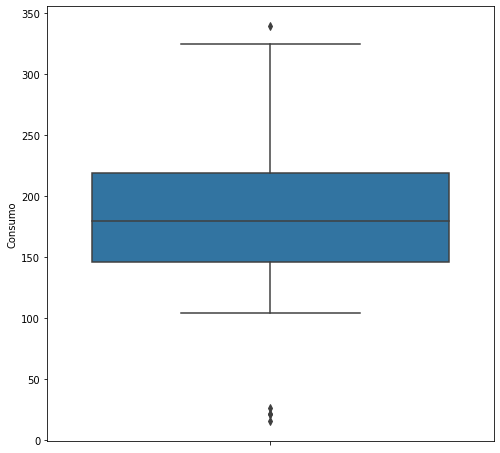

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
sns.boxplot(y=df.Consumo, orient='h')

<font size=5>**Vendo o total da quantidade de dados**

In [5]:
print('Tipos de motores:\n ', df.TipoMotor.value_counts())
print('\nTipo de transmissão:\n ', df.Transmissao.value_counts())
print('\nQuantidade de marchas:\n ', df.Marchas.value_counts())
print('\nQuantidade de cilindros:\n', df.Cilindros.value_counts())

marchas = df.TipoMotor.value_counts()
consumo = df.Consumo.value_counts()
motores0 = marchas.loc[0]
motores1 = marchas.loc[1]

Tipos de motores:
  0    18
1    14
Name: TipoMotor, dtype: int64

Tipo de transmissão:
  0    19
1    13
Name: Transmissao, dtype: int64

Quantidade de marchas:
  3    15
4    12
5     5
Name: Marchas, dtype: int64

Quantidade de cilindros:
 8    14
4    11
6     7
Name: Cilindros, dtype: int64


<font size=5>**Criando um grupo usando o Consumo e os Cilindros**

In [6]:
mediasConsumo = df.groupby('Consumo').mean()['Cilindros']

<font color = red size=5>**Médias de consumo por Cilindros:**

* Carros com 6 cilindros são os que tem uma media melhor de combustível.
* Carros com 8 cilindros são os que consomem mais combustível. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


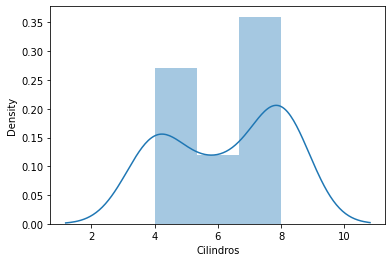

In [7]:
sns.distplot(mediasConsumo, bins=3)

<font color=red size=5>**Conclusão**:

Existe um grande consumo na marcha 5.

* Marcha 3: tem uma relação quase Simétrica (**Média = Mediana = Moda**)
* Marcha 4: tem uma relação Assimetria à Esquerda (**Mediana**)
* Marcha 5: Tem uma relação Assimetrica à Direita (**Média**)

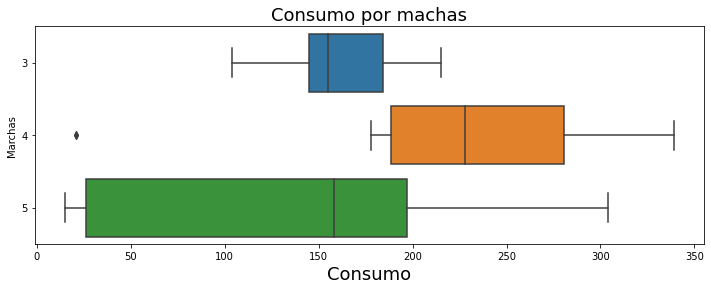

In [8]:
ax = sns.boxplot(x ='Consumo', y='Marchas', data = df, orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Consumo por machas',fontsize=18)
ax.set_xlabel('Consumo', fontsize=18)
ax

<font color=red size=5>**Criando um DataFrame com 2 colunas:**
* 1° col = tipos de motores;
* 2° col = Total de dados de cada motor.

In [9]:
dados = {
    'Motores' : [0,1],
    'Total' : [motores0, motores1]
}

dados = pd.DataFrame(dados)
dados

,Motores,Total
0,0,18
1,1,14


<font size=5>**Plotando os dados acima**

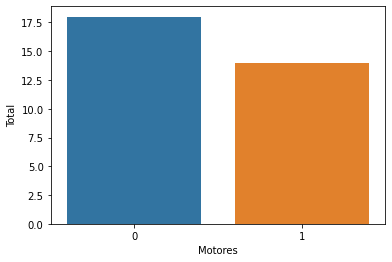

In [11]:
sns.barplot(x='Motores', y='Total', data = dados)

<font size=5>**Qual Tipo de motor tem o maior consumo**



> Motor 1: tem um alto consumo.



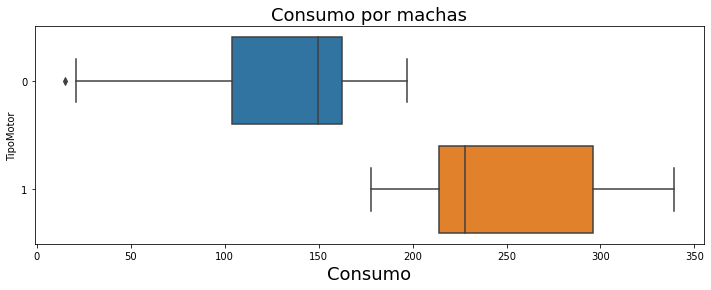

In [12]:
ax = sns.boxplot(x ='Consumo', y='TipoMotor', data = df, orient='h')
ax.figure.set_size_inches(12,4)
ax.set_title('Consumo por machas',fontsize=18)
ax.set_xlabel('Consumo', fontsize=18)
ax

##<font size = 8 color=Burgundy>**Regresão Linear**

In [15]:
df.head()

,Consumo,Cilindros,Cilindradas,RelEixoTraseiro,Peso,Tempo,TipoMotor,Transmissao,Marchas,Carburadors,HP
0,21,6,160,39,262,1646,0,1,4,4,110
1,21,6,160,39,2875,1702,0,1,4,4,110
2,228,4,108,385,232,1861,1,1,4,1,93
3,214,6,258,308,3215,1944,1,0,3,1,110
4,187,8,360,315,344,1702,0,0,3,2,175


In [16]:
df.shape

(32, 11)

**<font size=5>Matriz de correlação**

* Medida de associação linear entre duas variáveis:
* Sendo que -1 indica associação negativa perfeita
* +1 indica associação positiva perfeita

**Existem 2 colunas que se associam bem com a variável 'Consumo':**

* RelEixoTraseiro = 49% (Relevante)
* TipoMotor = 73% (Muito bom)

**Existem 2 colunas que se associam bem com a variável 'HP':**

* Cilindros = 83% (Muito bom)
* Carburadores = 75% (Muito bom)

In [17]:
df.corr().round(2)

,Consumo,Cilindros,Cilindradas,RelEixoTraseiro,Peso,Tempo,TipoMotor,Transmissao,Marchas,Carburadors,HP
Consumo,1.00,-0.54,0.09,0.49,-0.03,-0.07,0.73,0.09,0.03,-0.62,-0.55
Cilindros,-0.54,1.00,0.05,-0.26,0.17,0.11,-0.81,-0.52,-0.49,0.53,0.83
Cilindradas,0.09,0.05,1.00,0.10,-0.25,-0.47,0.02,-0.37,-0.14,-0.03,-0.06
RelEixoTraseiro,0.49,-0.26,0.10,1.00,-0.41,-0.45,0.32,0.23,0.38,-0.13,-0.11
Peso,-0.03,0.17,-0.25,-0.41,1.00,0.32,-0.12,-0.19,-0.34,-0.08,0.07
Tempo,-0.07,0.11,-0.47,-0.45,0.32,1.00,-0.05,-0.17,-0.50,-0.21,-0.02
TipoMotor,0.73,-0.81,0.02,0.32,-0.12,-0.05,1.00,0.17,0.21,-0.57,-0.72
Transmissao,0.09,-0.52,-0.37,0.23,-0.19,-0.17,0.17,1.00,0.79,0.06,-0.24
Marchas,0.03,-0.49,-0.14,0.38,-0.34,-0.50,0.21,0.79,1.00,0.27,-0.13
Carburadors,-0.62,0.53,-0.03,-0.13,-0.08,-0.21,-0.57,0.06,0.27,1.00,0.75


**<font size=5>Importando boxplo do Seaborn para ver o tipo de Assimetria/Simétria**



> Os dados estão Simétrico, é um excelente sinal, mostra uns concorrentes a outliers.

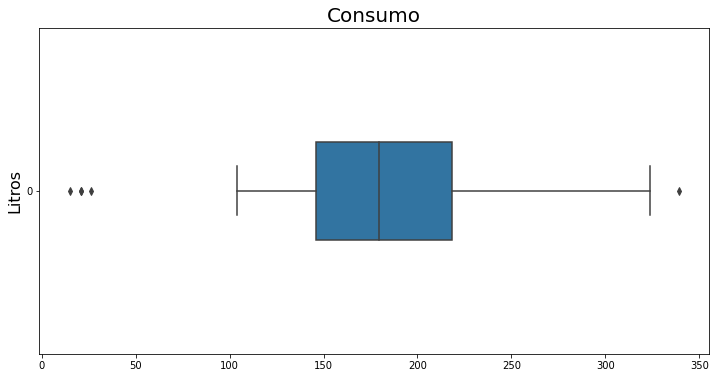

In [18]:
import seaborn as sns

ax = sns.boxplot(data=df['Consumo'],orient='h',width=0.3)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax

<font size=5>**Plotar um gráfico comparativo**


> Comparando o consumo entre os 2 tipos de motores


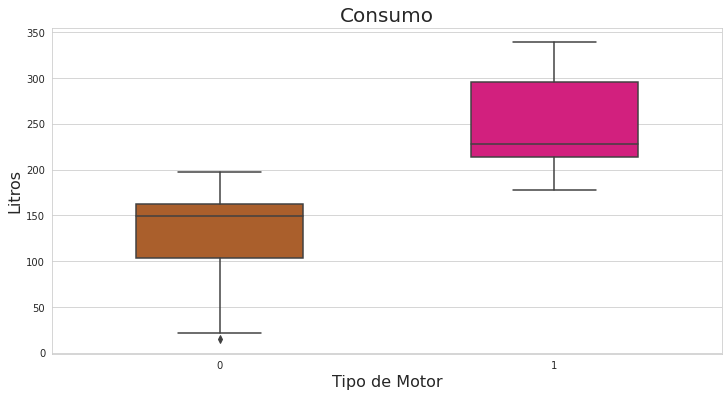

In [19]:
from seaborn.rcmod import set_palette

sns.set_palette('Accent_r') # paletas de cores
sns.set_style('whitegrid') # Muda o estilo

ax = sns.boxplot(y='Consumo',x='TipoMotor',data=df,orient='v',width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo', fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Tipo de Motor', fontsize=16)
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax

<font size=5>**Distribuição de frequência da variável dependente(y)**

> Me parece um gráfico com uma boa frequência

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


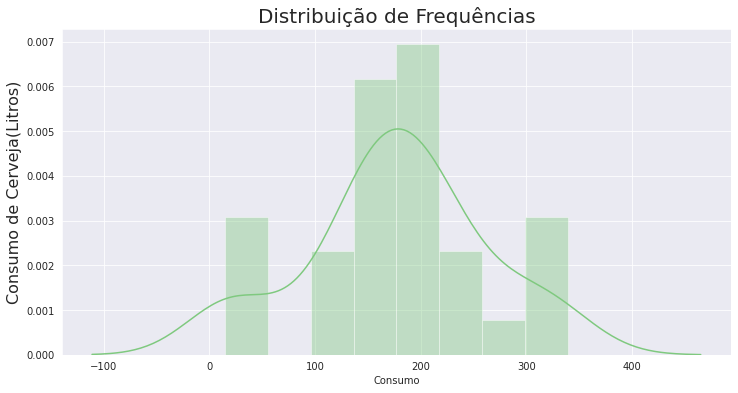

In [20]:
ax = sns.distplot(df['Consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Consumo de Cerveja(Litros)', fontsize=16)
ax = ax

<font size=5>**Plotar relacionamento entre pares de variáveis em um dataset**

* TipoMotor = Usado para comparação

* RelEixoTraseiro = estão bem espalhados os dados.

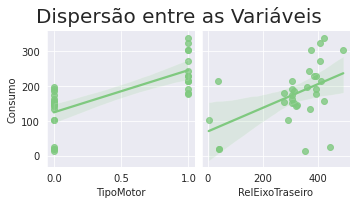

In [21]:
import warnings # Previnir erros e ignorar
warnings.filterwarnings('ignore')  

ax = sns.pairplot(df, y_vars='Consumo', x_vars=['TipoMotor','RelEixoTraseiro'], kind='reg') 
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.10) 
ax

<font size=5>**Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequências**

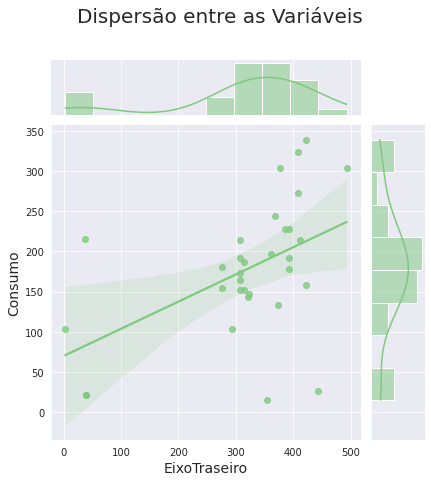

In [22]:
ax = sns.jointplot(x='RelEixoTraseiro', y='Consumo', data = df, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.10) 
ax.set_axis_labels('EixoTraseiro', 'Consumo', fontsize=14)

<font color = green size=5>**Fazendo a Regressão Linear**

In [23]:
from sklearn.model_selection import train_test_split

<font size = 5>**Criando uma Series(pandas) para armazenar o consumo de cerveja(Y)**

In [24]:
y = df.Consumo

<font size=5>**Criando um DataFrame(pandas) para armazenar as variáveis explicativas(X)**

In [25]:
x = df[['TipoMotor', 'RelEixoTraseiro']]

<font size=5>**Criando os datasets d treino  e teste**

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=2811)

**Verificando os tamanhos dos arquivos gerados pela função train_test_split**

In [27]:
x_train.shape

(22, 2)

In [28]:
x_test.shape

(10, 2)

<font size=5>**Importando LinearRegression e metrics da biblioteca Scikit-learn**

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:
modelo = LinearRegression()

<font size=5>**Treinando os dados**

In [31]:
modelo.fit(x_train, y_train)

LinearRegression()

<font size=5>**Coeficiente de Determinação - R²**

É uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entre 0 e 1 (quanto mais próximo de 1 melhor).

In [32]:
print('R² = {}'.format(modelo.score(x_train, y_train).round(2)))

R² = 0.66


<font size=5>**Gerando previsões para os dados de teste, usando o predict**

In [33]:
y_previsao = modelo.predict(x_test)

<font size=5>**Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo**


>  Está bem ruim as Previsões, entretanto estou mexendo com poucos dados




In [34]:
print('R² = %s' % metrics.r2_score(y_test, y_previsao).round(2))

R² = 0.38


<font size=5>**Obtendo previsões pontuais**

In [35]:
entrada = x_test[0:1]
entrada

,TipoMotor,RelEixoTraseiro
0,0,39


<font size=5>**Gerando previsão pontual**

> Variável modelo armazenar as variáveis de treino (x_train, y_train). Está fazendo a previsão adicionando a variável de test (entrada).



> **O motor '0', com RelEixoTraseiro '39', terá um consumo de  = 90.09 de combustivel**





In [36]:
modelo.predict(entrada)[0]

90.09341037252892

<font size=5>**Criando um simulador simples para teste de combustível**

In [42]:
TipoMotor = 1
RelEixoTraseiro = 60
entrada = [[TipoMotor, RelEixoTraseiro]]

print(f'{modelo.predict(entrada)[0].round(2)} de combustível')

186.94 de combustível


<font size=5>**Interpretação Coeficientes estimados**

In [43]:
modelo.intercept_

81.34097384793458

**Valor médio em R$**

In [45]:
import numpy as np

np.exp(modelo.intercept_)

2.1180494473284475e+35

**Obtendo o coeficientes de regressão**

Medem a elasticidade de Y

In [46]:
modelo.coef_

array([92.13242825,  0.22442145])

**Confirmando a ordem das variáveis explicativas no DataFrame**

In [47]:
x.columns

Index(['TipoMotor', 'RelEixoTraseiro'], dtype='object')

**Criando uma lista com os nomes das variáveis do modelo**

In [51]:
index = ['Consumo','TipoMotor','RelEixoTraseiro']

**Criando um DataFrame para armazenar os coeficientes do modelo**

In [52]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Consumo,81.340974
TipoMotor,92.132428
RelEixoTraseiro,0.224421


**Gerando as previsões do modelo para os dados de Treino**

In [53]:
y_previsto_train = modelo.predict(x_train)

**Gráfico de dispersão entre valor estimado e valor real**

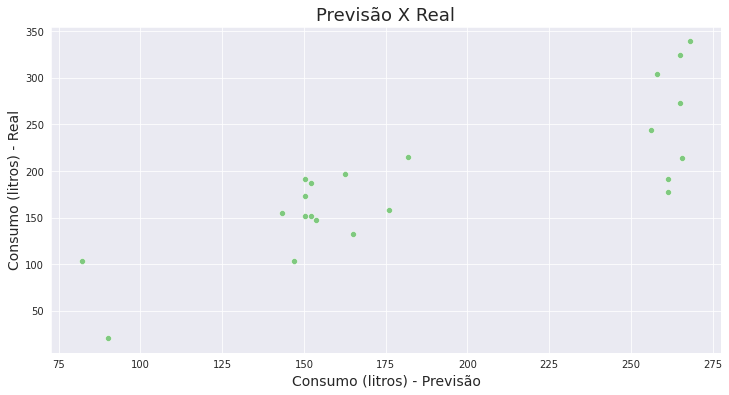

In [55]:
import seaborn as sns

ax = sns.scatterplot(x = y_previsto_train, y=y_train)
ax.figure.set_size_inches(12,6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Consumo (litros) - Previsão', fontsize=14)
ax.set_ylabel('Consumo (litros) - Real', fontsize=14)
ax

**Obtendo os resíduos**

In [56]:
residuos = y_train - y_previsto_train

**Gráfico de dispersão entra valor estimado e resíduos**

Método informal de verificação da hipótese de variância constante dos resíduos (homocedasticidade)

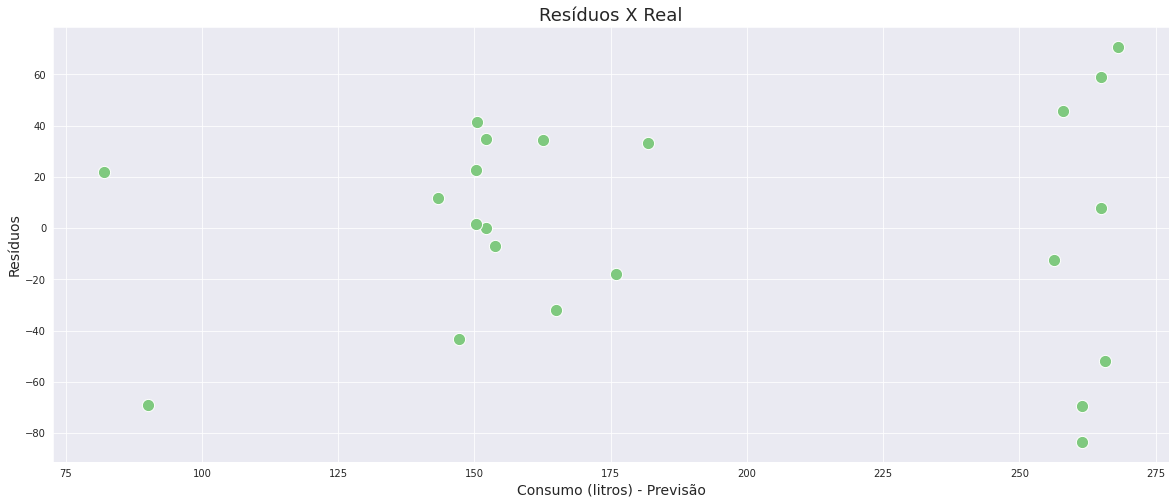

In [58]:
ax = sns.scatterplot(x = y_previsto_train, y=residuos, s=150) # s = 150, aumenta o tamanho da bolinha
ax.figure.set_size_inches(20,8)
ax.set_title('Resíduos X Real', fontsize=18)
ax.set_xlabel('Consumo (litros) - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

**Conclusão:**Média dos valores é '0' (bom sinal), porém teria que ficar dentro de uma variação. 

Ex: entre 40 e -40. No gráfico ele está passando do 60 e de -80, estão bem espalhados.

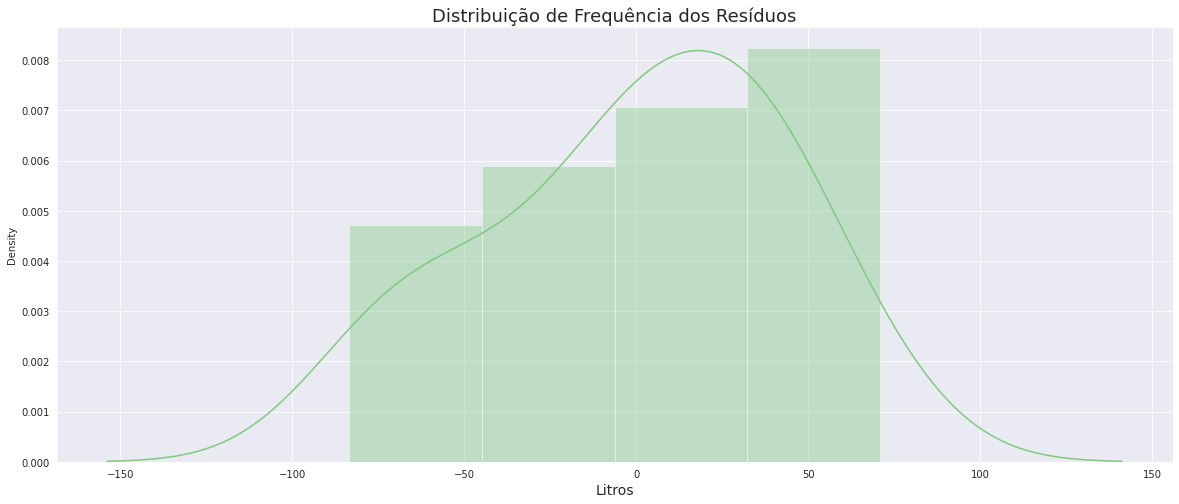

In [59]:
ax = sns.distplot(residuos)
ax.figure.set_size_inches(20,8)
ax.set_title('Distribuição de Frequência dos Resíduos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax

**Conclusão:**Pela linha do gráfico não parece haver erros.